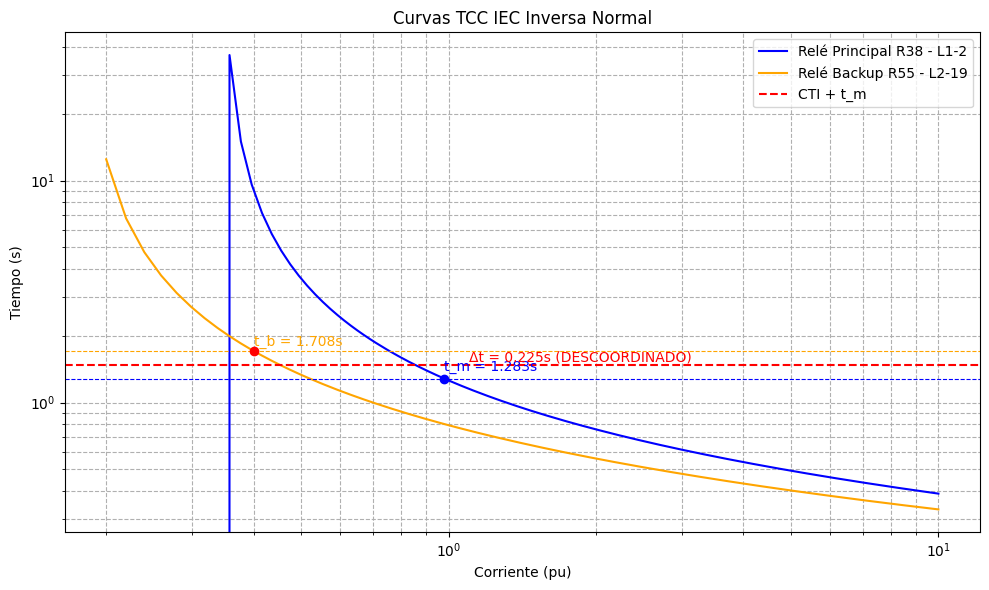

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Función IEC inversa normal (IEC 60255)
def tcc_iec_normal_inverse(I, pickup, TDS):
    A = 0.14
    B = 0.02
    M = I / pickup
    return TDS * (A / ((M ** 0.02) - 1))

# Parámetros del relé principal
TDS_main = 0.19389
pickup_main = 0.34416

# Parámetros del relé de respaldo
TDS_backup = 0.19785
pickup_backup = 0.17899

# Corrientes para graficar (en pu)
I = np.linspace(0.2, 10, 500)

# Curvas TCC
t_main = tcc_iec_normal_inverse(I, pickup_main, TDS_main)
t_backup = tcc_iec_normal_inverse(I, pickup_backup, TDS_backup)

# Punto de falla
I_main_fault = 0.980
t_m = 1.283
I_backup_fault = 0.400
t_b = 1.708
CTI = 0.2
delta_t = t_b - t_m - CTI

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(I, t_main, label='Relé Principal R38 - L1-2', color='blue')
plt.plot(I, t_backup, label='Relé Backup R55 - L2-19', color='orange')
plt.axhline(y=t_m, color='blue', linestyle='--', linewidth=0.8)
plt.axhline(y=t_b, color='orange', linestyle='--', linewidth=0.8)
plt.axhline(y=t_m + CTI, color='red', linestyle='--', label='CTI + t_m')

# Puntos de falla
plt.plot(I_main_fault, t_m, 'bo')
plt.plot(I_backup_fault, t_b, 'ro')

# Anotaciones
plt.text(I_main_fault, t_m + 0.1, f't_m = {t_m:.3f}s', color='blue')
plt.text(I_backup_fault, t_b + 0.1, f't_b = {t_b:.3f}s', color='orange')
plt.text(1.1, t_m + CTI + 0.05, f'Δt = {delta_t:.3f}s (DESCOORDINADO)', color='red')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Corriente (pu)')
plt.ylabel('Tiempo (s)')
plt.title('Curvas TCC IEC Inversa Normal')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import plotly.graph_objs as go

# Función IEC inversa normal
def tcc_iec_normal_inverse(I, pickup, TDS):
    A = 0.14
    B = 0.02
    M = I / pickup
    return TDS * (A / ((M ** 0.02) - 1))

# Parámetros
TDS_main = 0.19389
pickup_main = 0.34416
TDS_backup = 0.19785
pickup_backup = 0.17899

# Punto de falla
I_main_fault = 0.980
t_m = 1.283
I_backup_fault = 0.400
t_b = 1.708
CTI = 0.2

# Rango más fino para ver si se cruzan
I = np.linspace(0.3, 1.5, 1000)
t_main = tcc_iec_normal_inverse(I, pickup_main, TDS_main)
t_backup = tcc_iec_normal_inverse(I, pickup_backup, TDS_backup)

# Crear figura con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=I, y=t_main, mode='lines', name='Relé Principal R38 - L1-2', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=I, y=t_backup, mode='lines', name='Relé Backup R55 - L2-19', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=[I_main_fault], y=[t_m], mode='markers+text', name='t_m', marker=dict(color='blue', size=10),
                         text=[f"t_m = {t_m:.3f}s"], textposition="top center"))
fig.add_trace(go.Scatter(x=[I_backup_fault], y=[t_b], mode='markers+text', name='t_b', marker=dict(color='red', size=10),
                         text=[f"t_b = {t_b:.3f}s"], textposition="top center"))
fig.add_trace(go.Scatter(x=[min(I), max(I)], y=[t_m + CTI, t_m + CTI], mode='lines', name='CTI + t_m',
                         line=dict(color='red', dash='dash')))

fig.update_layout(
    title='Curvas TCC IEC Inversa Normal (Zoom)',
    xaxis_title='Corriente (pu)',
    yaxis_title='Tiempo (s)',
    yaxis_type="log",
    xaxis_type="log",
    template="plotly_white"
)

fig.show()